In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline

In [2]:
DF = pd.read_csv("interviewData.csv")
print("total:", DF.shape)
DF.head()

total: (1440, 400)


A_1  A_2  A_3  A_4  A_5  A_6  A_7  A_8  A_9  A_10           ...             \
0    1    0    0    0    1    1    0    0    0     0           ...              
1   -2    1    2    3    2    2    2    0    0     1           ...              
2    0    0    2    0    0    0    0    0   -1     0           ...              
3    0    0    0    0    1    0    0    0    0     0           ...              
4   -2    1   -1    0    1    1    1    0    0     0           ...              

   diex_WS1  diey_WS1          ecid  site_WS1  totaldietestseconds_WS1  \
0        -3        15      4.05E+10         1                    76245   
1         2         1  0404E95646B4         3                    75269   
2         2        23  0404730E93DF         5                    78917   
3        17        14  0404A52D1C79         2                    83262   
4         6        27  0404FF90DCE8         5                    73490   

   touchdownseq_WS1  wafername_WS1  hardbin_FT1  site_FT1  \
0                69    T27H82-07G0            1         3   
1               119    T27H82-07G0            1         8   
2                35    T27H82-07G0            1         4   
3                79    T27H82-07G0            1         1   
4                19    T27H82-07G0            1         6   

   totaldietestseconds_FT1  
0                    77054  
1                    75299  
2                    77512  
3                    82429  
4                    75694  

[5 rows x 400 columns]

In [3]:
if not DF.empty:
    print("No missing data")

No missing data


In [4]:
print(len(DF.keys()))
print(DF.keys())

400
Index(['A_1', 'A_2', 'A_3', 'A_4', 'A_5', 'A_6', 'A_7', 'A_8', 'A_9', 'A_10',
       ...
       'diex_WS1', 'diey_WS1', 'ecid', 'site_WS1', 'totaldietestseconds_WS1',
       'touchdownseq_WS1', 'wafername_WS1', 'hardbin_FT1', 'site_FT1',
       'totaldietestseconds_FT1'],
      dtype='object', length=400)


## Visualize the wafer

In [5]:
waferName = DF.groupby("wafername_WS1")

In [6]:
waferName.size()

wafername_WS1
T27H82-07G0    539
T27H82-08F3    437
T27H82-09E6    464
dtype: int64

In [7]:
G0 = waferName.get_group("T27H82-07G0")
G0_x = waferName.get_group("T27H82-07G0")['diex_WS1']
G0_y = waferName.get_group("T27H82-07G0")['diey_WS1']
G0_hardbin = waferName.get_group("T27H82-07G0")['hardbin_FT1']

F3 = waferName.get_group("T27H82-08F3")
F3_x = waferName.get_group("T27H82-08F3")['diex_WS1']
F3_y = waferName.get_group("T27H82-08F3")['diey_WS1']
F3_hardbin = waferName.get_group("T27H82-08F3")['hardbin_FT1']

E6 = waferName.get_group("T27H82-09E6")
E6_x = waferName.get_group("T27H82-09E6")['diex_WS1']
E6_y = waferName.get_group("T27H82-09E6")['diey_WS1']
E6_hardbin = waferName.get_group("T27H82-09E6")['hardbin_FT1']

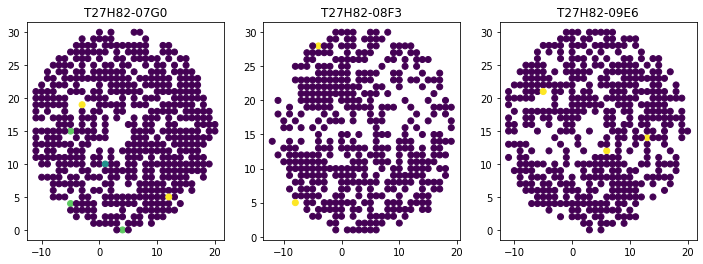

In [8]:
f = plt.figure(figsize=(12,4))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
#x = np.linspace(0,4,1000)
ax.scatter(G0_x, G0_y, c=G0_hardbin)
ax.set_title("T27H82-07G0")
ax2.scatter(F3_x, F3_y, c=F3_hardbin)
ax2.set_title("T27H82-08F3")
ax3.scatter(E6_x, E6_y, c=E6_hardbin)
ax3.set_title("T27H82-09E6")
plt.show()

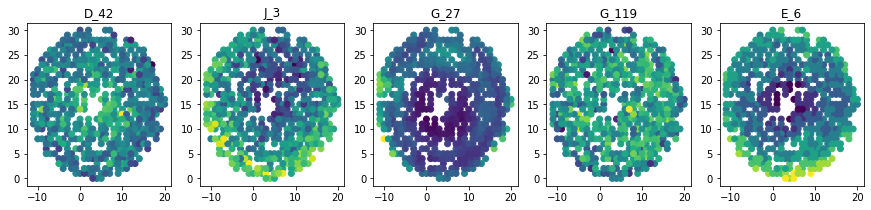

In [9]:
feature_random = random.choices(DF.keys()[:-10], k=5)
f = plt.figure(figsize=(15,3))
num = 5
for i in range(num):
    idx = int("1"+str(num)+str(i+1))
    ax = f.add_subplot(idx)
    ax.scatter(G0_x, G0_y , c=G0[feature_random[i]])
    ax.set_title(feature_random[i])

## Pearson correlation

In [10]:
electrical_test = DF[[key for key in DF.keys()[:390]]]
test_time = DF[['totaldietestseconds_WS1', 'totaldietestseconds_FT1', 'touchdownseq_WS1']]
site = DF[['site_WS1', 'site_FT1']]
location = DF[['diex_WS1', 'diey_WS1']]

In [11]:
pearson_corr_el = {}
pearson_corr_t = {}
pearson_corr_site = {}
pearson_corr_loca = {}

for j in range(len(electrical_test.keys())):
    feature = electrical_test.keys()[j]
    pearson_corr_el[feature] = pearsonr(electrical_test[feature], DF['hardbin_FT1'])[0]

for i in range(len(test_time.keys())):
    time = test_time.keys()[i]
    pearson_corr_t[time] = pearsonr(test_time[time], DF['hardbin_FT1'])[0]

for n in range(len(site.keys())):
    site_type = site.keys()[n]
    pearson_corr_site[site_type] = pearsonr(site[site_type], DF['hardbin_FT1'])[0]

for p in range(len(location.keys())):
    lo = location.keys()[p]
    pearson_corr_loca[lo] = pearsonr(location[lo], DF['hardbin_FT1'])[0]
    
pearson_corr_el = sorted(pearson_corr_el.items(), key=lambda x: abs(x[1]), reverse=True)
pearson_corr_t = sorted(pearson_corr_t.items(), key=lambda y: abs(y[1]), reverse=True)
pearson_corr_site = sorted(pearson_corr_site.items(), key=lambda z: abs(z[1]), reverse=True)
pearson_corr_loca = sorted(pearson_corr_loca.items(), key=lambda p: abs(p[1]), reverse=True)

In [12]:
TOP10 = pearson_corr_el[:10]

In [13]:
TOP10

[('G_126', 0.06717625934181505),
 ('G_91', -0.0650405871270579),
 ('G_122', -0.06418299611985534),
 ('D_49', -0.06360777771423969),
 ('F_24', 0.05835418676998978),
 ('D_34', 0.057617568316130165),
 ('F_1', 0.056342942165168844),
 ('F_27', 0.05619806783303662),
 ('D_10', 0.05533811378788524),
 ('F_22', 0.055273384989192945)]

In [14]:
pearson_corr_t

[('totaldietestseconds_FT1', 0.05074444660611391),
 ('touchdownseq_WS1', 0.03226303852470214),
 ('totaldietestseconds_WS1', 0.0016278524231414732)]

In [15]:
pearson_corr_site

[('site_FT1', -0.039071409966477906), ('site_WS1', -0.03286291523002114)]

In [16]:
pearson_corr_loca

[('diex_WS1', -0.03798132773568302), ('diey_WS1', -0.03679258224953458)]

## Data preprocessing

In [17]:
features_ls = list(DF.keys()) ## exclude ecid, wafername_WS1, and hardbin_FT1
non_features = ['ecid', 'wafername_WS1', 'hardbin_FT1']
for non_f in non_features:
    features_ls.remove(non_f)

In [18]:
features = DF[features_ls]
features.head()

A_1  A_2  A_3  A_4  A_5  A_6  A_7  A_8  A_9  A_10           ...             \
0    1    0    0    0    1    1    0    0    0     0           ...              
1   -2    1    2    3    2    2    2    0    0     1           ...              
2    0    0    2    0    0    0    0    0   -1     0           ...              
3    0    0    0    0    1    0    0    0    0     0           ...              
4   -2    1   -1    0    1    1    1    0    0     0           ...              

       J_56      J_57      J_58  diex_WS1  diey_WS1  site_WS1  \
0  0.620765  1.545064  1.384001        -3        15         1   
1  0.412771  1.558442  1.219390         2         1         3   
2  0.111832  1.538462  1.300521         2        23         5   
3  1.010847  2.320926  1.558374        17        14         2   
4  0.327142  1.931330  0.951548         6        27         5   

   totaldietestseconds_WS1  touchdownseq_WS1  site_FT1  \
0                    76245                69         3   
1                    75269               119         8   
2                    78917                35         4   
3                    83262                79         1   
4                    73490                19         6   

   totaldietestseconds_FT1  
0                    77054  
1                    75299  
2                    77512  
3                    82429  
4                    75694  

[5 rows x 397 columns]

### Normalize

In [19]:
scaler = MinMaxScaler()

In [20]:
feature_elec = list(electrical_test.keys())
test_time = list(test_time.keys())
location_xy = list(location.keys())

features[feature_elec] = scaler.fit_transform(features[feature_elec])
features[test_time] = scaler.fit_transform(features[test_time])
features[location_xy] = scaler.fit_transform(features[location_xy])

/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/eric/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [21]:
features.head()

A_1       A_2       A_3       A_4    A_5       A_6       A_7    A_8  \
0  0.444444  0.571429  0.428571  0.428571  0.500  0.666667  0.500000  0.625   
1  0.111111  0.714286  0.714286  0.857143  0.625  0.777778  0.833333  0.625   
2  0.333333  0.571429  0.714286  0.428571  0.375  0.555556  0.500000  0.625   
3  0.333333  0.571429  0.428571  0.428571  0.500  0.555556  0.500000  0.625   
4  0.111111  0.714286  0.285714  0.428571  0.500  0.666667  0.666667  0.625   

        A_9      A_10           ...                 J_56      J_57      J_58  \
0  0.714286  0.666667           ...             0.369854  0.335475  0.357335   
1  0.714286  0.833333           ...             0.245913  0.341259  0.281740   
2  0.571429  0.666667           ...             0.066586  0.332620  0.318998   
3  0.714286  0.666667           ...             0.602300  0.670961  0.437413   
4  0.714286  0.666667           ...             0.194888  0.502498  0.158738   

   diex_WS1  diey_WS1  site_WS1  totaldietestseconds_WS1  touchdownseq_WS1  \
0   0.28125  0.500000         1                 0.158679          0.575000   
1   0.43750  0.033333         3                 0.152071          0.991667   
2   0.43750  0.766667         5                 0.176771          0.291667   
3   0.90625  0.466667         2                 0.206191          0.658333   
4   0.56250  0.900000         5                 0.140025          0.158333   

   site_FT1  totaldietestseconds_FT1  
0         3                 0.128300  
1         8                 0.109506  
2         4                 0.133204  
3         1                 0.185858  
4         6                 0.113736  

[5 rows x 397 columns]

In [22]:
DF[list(features.keys())] = features[list(features.keys())]
DF_by_wafer = DF.groupby("wafername_WS1")
print(DF_by_wafer.size())

wafername_WS1
T27H82-07G0    539
T27H82-08F3    437
T27H82-09E6    464
dtype: int64


In [23]:
## Train set: T27H82-07G0, T27H82-08F3  Test set: T27H82-09E6
#
G0 = DF_by_wafer.get_group("T27H82-07G0")
F3 = DF_by_wafer.get_group("T27H82-08F3")
E6 = DF_by_wafer.get_group("T27H82-09E6")
DF_train = pd.concat([G0,F3],axis=0)
DF_test = E6.reset_index(drop=True)

In [24]:
X_train = []
Y_train = []
X_test = []
Y_test = []

for k in range(len(DF_train)):
    feature_tmp = []
    target_tmp = []
    Y_train.append(DF_train['hardbin_FT1'][k])
    for s in features.keys():
        feature_tmp.append(DF_train[s][k])
    #target_tmp.append(DF_train['hardbin_FT1'][k])
    X_train.append(feature_tmp)
X_train = np.array(X_train)
Y_train = np.array(Y_train)

for k in range(len(DF_test)):
    _feature_tmp = []
    _target_tmp = []
    Y_test.append(DF_test['hardbin_FT1'][k])
    for s in features.keys():
        _feature_tmp.append(DF_test[s][k])
    #_target_tmp.append(DF_test['hardbin_FT1'][k])
    X_test.append(_feature_tmp)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

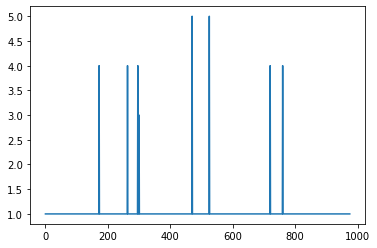

In [25]:
plt.figure()
plt.plot(Y_train)

In [26]:
print("X_train:", X_train.shape, "Y_train:", Y_train.shape)
print("X_test:", X_test.shape, "Y_test:", Y_test.shape)

X_train: (976, 397) Y_train: (976,)
X_test: (464, 397) Y_test: (464,)


### Split and shuffle

In [27]:
def splitData(Data, ratio):
    num = int(round(len(Data)*ratio))
    par = len(Data) - num
    x_main = Data[:num]
    y_main = Data[:num]
    x_mini = Data[-par:]
    y_mini = Data[-par:]
    return x_main, y_main, x_mini, y_mini

In [28]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [29]:
X_train, Y_train = unison_shuffled_copies(X_train, Y_train)

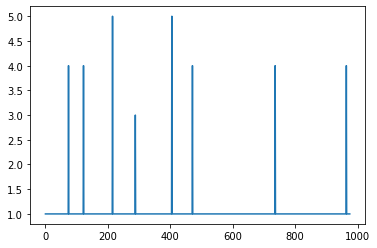

In [32]:
plt.figure()
plt.plot(Y_train)

In [87]:
## Take it as binary classification
Y_train_bin = []
Y_test_bin = []
fail = 0
for data in Y_train:
    if data != 1:
        Y_train_bin.append(fail)
    else:
        Y_train_bin.append(data)
for data in Y_test:
    if data != 1:
        Y_test_bin.append(fail)
    else:
        Y_test_bin.append(data)

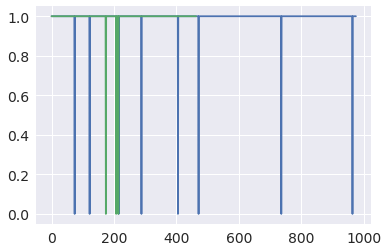

In [88]:
plt.figure()
plt.plot(Y_train_bin)
plt.plot(Y_test_bin)

## Model training

### SVM

In [139]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
from sklearn.metrics import accuracy_score

In [140]:
clf = svm.SVC(class_weight={0:10000}, gamma=100)

In [141]:
clf.fit(X_train, Y_train_bin)

SVC(C=1.0, cache_size=200, class_weight={0: 10000}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [142]:
Y_predict = clf.predict(X_test)

In [143]:
confusion_matrix = confusion_matrix(Y_test_bin, Y_predict)

In [144]:
confusion_matrix

array([[  0,   3],
       [  0, 461]])

Score: 0.9935344827586207


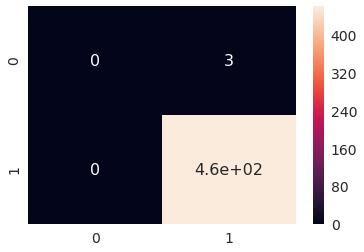

In [145]:
score = accuracy_score(Y_test, Y_predict)
print("Score:", score)
df_cm = pd.DataFrame(confusion_matrix, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

## SGDClassifier

In [149]:
from sklearn.linear_model import SGDClassifier

In [155]:
sgdclf = SGDClassifier(loss='hinge', penalty="l2", max_iter=100)

In [156]:
sgdclf.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [62]:
y_pre = sgdclf.predict(X_test)

In [63]:
confusion_matrix(Y_test, y_pre)

array([[461,   0],
       [  3,   0]])

## Imbalanced Data problem

#### Strategy 1: Cost sensetive SVM 
#### Strategy 2: One-class SVM learning
#### Strategy 3: Anomaly detection (Novelty datection)
#### Strategy 4: Penalize (regularization term L1/L2)
#### Strategy 5: Resampling the dataset (undersampling)

## Strategy 1. Cost sensetive SVM

## Strategy 2. One-class SVM

In [41]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

### Random forest